# 20250130 / 데이터 전처리 및 EDA

In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 1. 데이터 로드

In [3]:
data = pd.read_csv('Myntra.csv')

In [4]:
print("데이터 크기:", data.shape)
print(data.head())

데이터 크기: (36000, 8)
                               reviewId  \
0  d94ecf4e-7f4e-4bd4-888c-bc28f34d98f5   
1  1c86aefc-4565-4c79-999b-adbb5c21c221   
2  e87269d2-e47c-45a4-86dd-57b78708007c   
3  ef5a72f2-e12a-43bd-887e-32c01c315926   
4  98b28646-a2b9-439f-b5ac-762c1027af1f   

                                             content  score  thumbsUpCount  \
0  Terrible customer service. They first mention ...      1              0   
1  Disgusting experience. My Mobile number was su...      1              9   
2  1star deducted because of the update about the...      3              0   
3  Myntra used to be up to date with return polic...      1              0   
4  Mytra offers a seamless shopping experience wi...      5            244   

              at                                       replyContent  \
0  1688373095000  Hi, we wish to turn around your experience. Pl...   
1  1653331305000  Hello there. We wish to win you back, and we w...   
2  1577696828000                        

### 2. 데이터 정보 확인

- 데이터 결측치 / 타입 / 요약 정보 확인

In [5]:
data.head()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewId       36000 non-null  object 
 1   content        36000 non-null  object 
 2   score          36000 non-null  int64  
 3   thumbsUpCount  36000 non-null  int64  
 4   at             36000 non-null  int64  
 5   replyContent   14520 non-null  object 
 6   repliedAt      14520 non-null  float64
 7   appName        36000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.2+ MB


### 3. 데이터 클린징

- 결측치 있는 행 제거
- reviewId, at, repliedAt 열 제거
- 중복 데이터 제거

In [6]:
data.dropna(inplace=True)

data.drop(['reviewId', 'at', 'repliedAt'], axis=1, inplace=True)

data.drop_duplicates(inplace=True)

In [7]:
print("열 제거 후 데이터 크기:", data.shape)
print(data.head())

열 제거 후 데이터 크기: (14519, 5)
                                             content  score  thumbsUpCount  \
0  Terrible customer service. They first mention ...      1              0   
1  Disgusting experience. My Mobile number was su...      1              9   
3  Myntra used to be up to date with return polic...      1              0   
5  I had horrible experience with this app. I ord...      1            108   
7  It's the worst shopping site ever! Whenever yo...      1             77   

                                        replyContent appName  
0  Hi, we wish to turn around your experience. Pl...  Myntra  
1  Hello there. We wish to win you back, and we w...  Myntra  
3  Hey! Give us an opportunity to put things righ...  Myntra  
5  Hey! We regret any inconvenience caused while ...  Myntra  
7  Hey! We regret any inconvenience caused while ...  Myntra  


#### 텍스트 전처리

In [8]:
print("전처리 전 첫 5개 리뷰 내용:")
print(data['content'].head())

전처리 전 첫 5개 리뷰 내용:
0    Terrible customer service. They first mention ...
1    Disgusting experience. My Mobile number was su...
3    Myntra used to be up to date with return polic...
5    I had horrible experience with this app. I ord...
7    It's the worst shopping site ever! Whenever yo...
Name: content, dtype: object


- 소문자 변환 / 특수 문자 제거 / 공백 여러 칸 -> 공백 한 칸으로 변경

In [9]:
import re

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-z\s]', '', text) 
    text = re.sub(r'\s+', ' ', text) 
    return text

data['content'] = data['content'].apply(clean_text)
data['replyContent'] = data['replyContent'].apply(clean_text)

In [10]:
print("전처리 후 첫 5개 리뷰 내용:")
print(data['content'].head())

전처리 후 첫 5개 리뷰 내용:
0    terrible customer service they first mention t...
1    disgusting experience my mobile number was sus...
3    myntra used to be up to date with return polic...
5    i had horrible experience with this app i orde...
7    its the worst shopping site ever whenever you ...
Name: content, dtype: object


### 4. 탐색적 데이터 분석 (EDA)

- 한글 & 마이너스 기호 깨짐 방지 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

- 리뷰 점수 분포 확인

C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


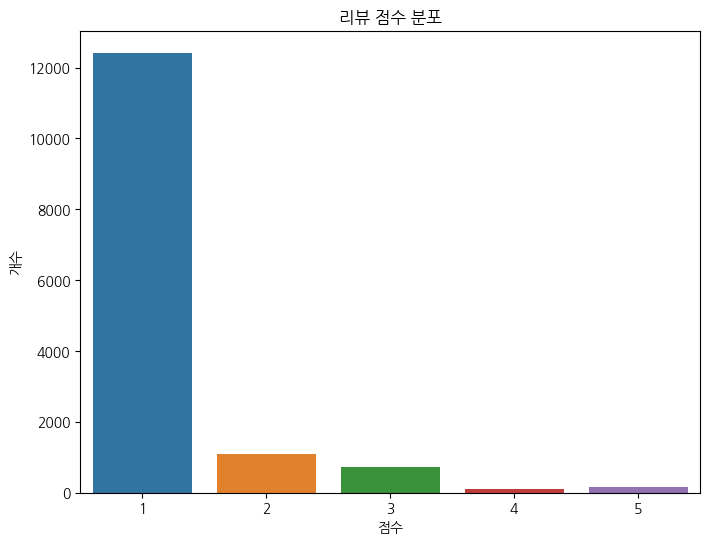

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=data)
plt.title('리뷰 점수 분포')
plt.xlabel('점수')
plt.ylabel('개수')
plt.show()

- thumbsUpCount 점수별 평균

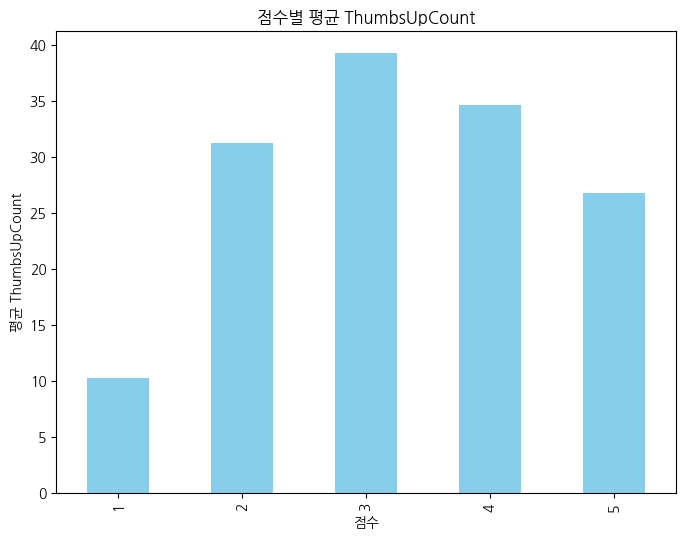

In [13]:
avg_thumbs = data.groupby('score')['thumbsUpCount'].mean()
avg_thumbs.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('점수별 평균 ThumbsUpCount')
plt.xlabel('점수')
plt.ylabel('평균 ThumbsUpCount')
plt.show()

- 리뷰 내용에 대한 워드클라우드 생성

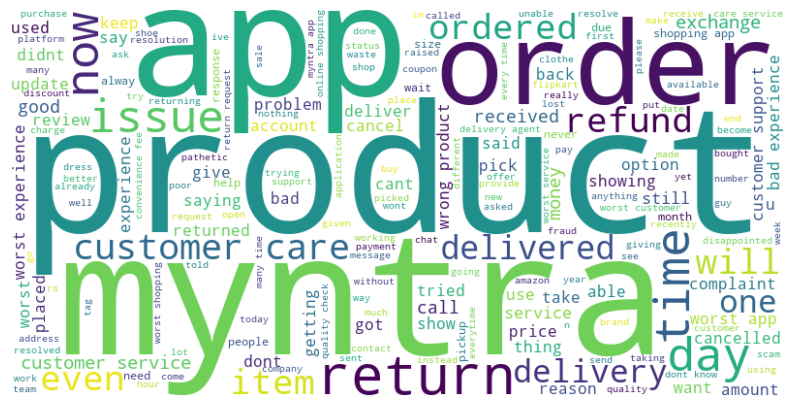

In [14]:
all_reviews = ' '.join(data['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- ThumbsUpCount와 점수 간의 관계

C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


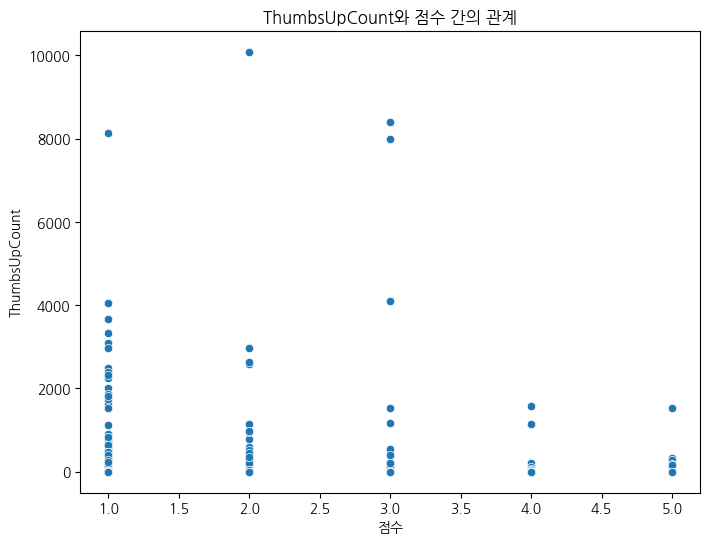

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='thumbsUpCount', data=data)
plt.title('ThumbsUpCount와 점수 간의 관계')
plt.xlabel('점수')
plt.ylabel('ThumbsUpCount')
plt.show()

### 5. 긍정/부정 감정 특성 추가

- 점수에 따라 긍정적/부정적 감정을 나타내는 특성 추가

In [16]:
data['sentiment'] = data['score'].apply(lambda x: 'positive' if x >= 4 else 'negative')